In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

# Regression Model

In [2]:
df=sns.load_dataset('mpg')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [20]:
df['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [19]:
x=df.iloc[:,1:8]
y=df['mpg']

In [29]:
x['origin']

0         usa
1         usa
2         usa
3         usa
4         usa
        ...  
393       usa
394    europe
395       usa
396       usa
397       usa
Name: origin, Length: 398, dtype: object

In [30]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)
dummy=ohe.fit_transform(x[['origin']])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [45]:
ohe.categories_[0]

array(['europe', 'japan', 'usa'], dtype=object)

In [49]:
x=pd.concat([x,pd.DataFrame(dummy,columns=list(i for i in ohe.categories_[0]))],axis=1)
x=x.drop('origin',axis=1)

In [54]:
x['horsepower']=x['horsepower'].fillna(x['horsepower'].mean())

In [78]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [79]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x,y)

LinearRegression()

In [80]:
y_pred=mlr.predict(x)

In [81]:
y_test=pd.concat([y,pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
y_test.head()

,mpg,y_pred
0,18.0,14.948707
1,15.0,14.130343
2,18.0,15.315450
3,16.0,15.105288
4,17.0,14.930819


<Axes: xlabel='mpg', ylabel='y_pred'>

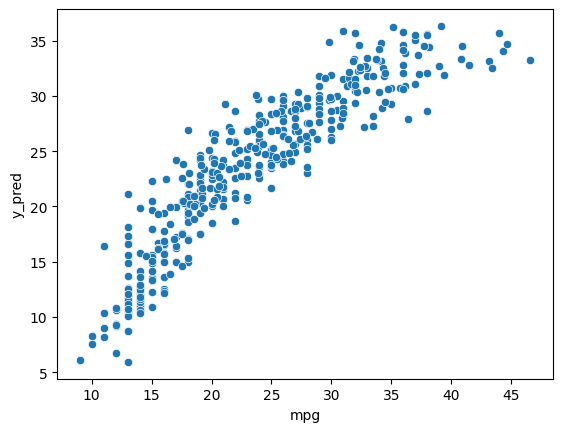

In [82]:
sns.scatterplot(data=y_test, x='mpg',y='y_pred')

In [83]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(mean_squared_error(y, y_pred))
print(r2_score(y,y_pred))

10.696130080122666
0.8244697856581007


# 분류 모델

In [85]:
df2=sns.load_dataset('titanic')
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [87]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [88]:
y=df2['survived']
x=df2[['pclass','sex','age','sibsp','parch','fare','embarked','class']]

In [89]:
x['age']=x['age'].fillna(x['age'].mean())

<ipython-input-89-e75602833643>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['age']=x['age'].fillna(x['age'].mean())


In [100]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dummy=le.fit_transform(x[['sex']])
x['sex']=dummy

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-100-311f17f651dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['sex']=dummy


In [102]:
x['class']=x['class'].apply(lambda x:2 if x=='Third' else (0 if x=='First' else 1))

<ipython-input-102-52a2061857c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['class']=x['class'].apply(lambda x:2 if x=='Third' else (0 if x=='First' else 1))


In [104]:
ohe=OneHotEncoder(sparse=False)
dummy=ohe.fit_transform(x[['embarked']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [105]:
x=pd.concat([x,pd.DataFrame(dummy,columns=list(i for i in ohe.categories_[0]))],axis=1)
x=x.drop('embarked',axis=1)

In [113]:
x=x.iloc[:,:10]
x=sc.fit_transform(x)

In [114]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l2', C=10)

In [116]:
lr.fit(x,y)
y_pred=lr.predict(x)

In [117]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y,y_pred))
print(confusion_matrix(y,y_pred))

0.8013468013468014
[[474  75]
 [102 240]]
